# What is ANN:
Artificial Neural Networks are computational models inspired by the human brain. They consist of layers of artificial neurons that mimic biological neurons to process information and make decisions.

# Building Blocks of ANN

## The Linear Unit 

Let's start with the fundamental component of a neural network: the individual neuron. A **neuron** (or **unit**) with a single input can be represented as follows:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="text-align: center; font-style: italic">
    <center>The Linear Equation: $y = w x + b$</center>
</figcaption>
</figure>

The input is denoted as `x`, and its connection to the neuron has an associated **weight**, `w`. Whenever a value passes through a connection, it is multiplied by the connection's weight. Thus, for the input `x`, the neuron receives `w * x`. A neural network "learns" by adjusting its weights.

The term `b` represents a special type of weight known as **bias**. Unlike other weights, the bias is not linked to any input data. Instead, we include a constant value of `1` in the diagram, ensuring that the neuron receives `b` (since `1 * b = b`). The bias allows the neuron to influence the output independently of its inputs.

The final output of the neuron is `y`. To determine this output, the neuron sums all incoming values through its connections. The neuron's activation function follows the equation:

$$y = w x + b$$

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Does the formula $y = w x + b$ look familiar?</strong><br>
This is the equation of a straight line! It represents the slope-intercept form, where `w` corresponds to the slope and `b` is the y-intercept.
</blockquote>

## Using a Single Neuron Model for Temperature Conversion
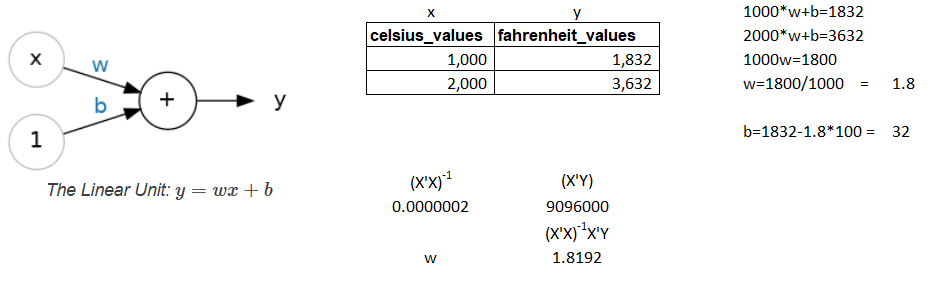

In [36]:
import numpy as np
X=np.array([1000,2000])
Y=np.array([1832,3632])
XTX=np.dot(X.T,X)
# Compute the inverse of XTX
# XTX_inv = np.linalg.inv(XTX) use this if XTX is a matrix not scalar
# since XTX is a scaler so we can calculate inverse as 1/XTX
XTX_inv=1/XTX   
XTY=np.dot(X.T,Y)
w= XTX_inv*XTY
w

1.8192

## What is Tensor ? Why we need tensorflow library?

A tensor is multidimentional data representation/object.

1. **Scalar** (single number) is a 0D tensor → 5

2. **Vector** (a list of numbers) is a 1D tensor → [3, 7, 1]

3. **Matrix** (table of numbers) is a 2D tensor →[[1,2],[3,4]]

4. **Tensor** extends this idea to 3D, 4D, or more → Imagine a cube of numbers storing complex data like images or videos.

TensorFlow is an open-source deep learning framework developed by Google that simplifies the creation and optimization of neural networks. Here's why it's essential:

**Efficient Tensor Computation** → TensorFlow is optimized for handling tensors efficiently, making operations on multi-dimensional data fast and scalable.

**Scalability** → TensorFlow supports distributed computing, allowing models to train on large datasets across multiple machines.

**GPU and TPU Support** → TensorFlow enables high-speed computation using GPUs and TPUs, accelerating deep learning workloads.

**Pre-built Tools and Models** → It includes ready-to-use neural network layers, optimizers, and datasets, making model development easier. There is **Keras** api in tensorflow which help in simplifying the complexity of deep learning model development.

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

X=np.array([1000,2000])
Y=np.array([1832,3632])

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Batch Size Flexibility (None)**

The None indicates an unspecified batch size, meaning the model can accept any number of input samples during training or inference.

For instance, if you provide a batch of 10 inputs, the shape would dynamically adjust to (10, 1)

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Prepare data
X = np.array([1000, 2000], dtype=float)
Y = np.array([1832, 3632], dtype=float)

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # Single neuron with 1 input feature
])
# Compile the model
model.compile(loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=1, verbose=0)  # Training with 500 epochs

model.summary()

# Print model weights
weights = model.get_weights()
print("Model Weights:", weights)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

Model Weights: [array([[-1.25185]], dtype=float32), array([0.00316228], dtype=float32)]


In [39]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Prepare data
X = np.array([1000, 2000], dtype=float)
Y = np.array([1832, 3632], dtype=float)

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # Single neuron with 1 input feature
])
# Compile the model
model.compile(loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=1, verbose=0)  # Training with 1 epochs

model.summary()

# Print model weights
weights = model.get_weights()
print("Model Weights:", weights[0])

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

Model Weights: [[0.689852]]


## The Non-Linear Unit

To capture the non-linearity in the model we added the the transformation on the linear unit to make it non linear unit. we can understand it as logistic regression. we are using sigmoid transformation on the linear combination of independent variables. 

This transformation function in Neural Network called the activation function

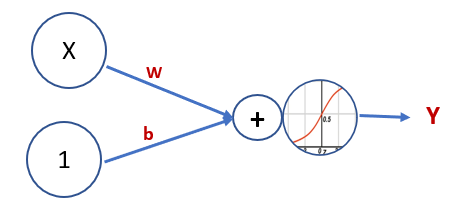

### **Activation Functions**
Activation functions determine the output of a neuron based on its input. They introduce non-linearity, enabling the network to learn complex patterns.

#### **Sigmoid**:
- Formula:$$ f(x) = \frac{1}{1 + e^{-x}}  $$
- Maps inputs to a range between 0 and 1, making it suitable for probabilities.

**Analogy**: Think of it as a probability dial. Any input is converted to a probability score.

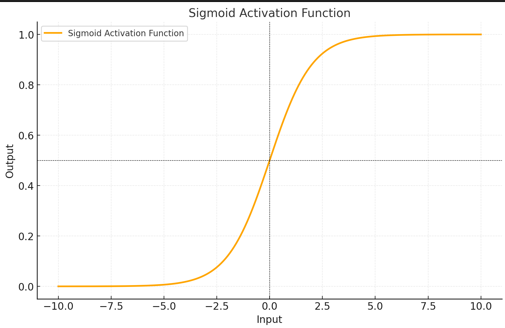

---
#### **ReLU (Rectified Linear Unit)**:
- Formula: $$ f(x) = max(0, x) $$
- Allows positive values to pass while setting negative values to 0.

**Analogy**: Imagine water flowing through a pipe. If the valve (input) is negative, no water flows.

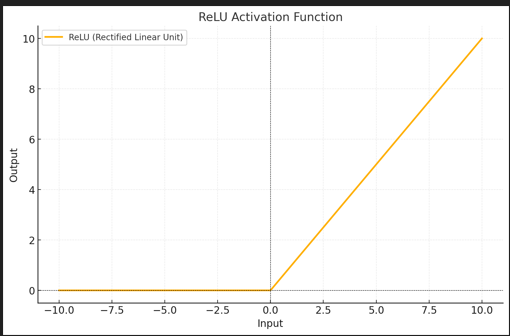


### **Forward Propagation**
Forward propagation is the process of passing inputs through the network to compute the output.

**Analogy**: It’s like a conveyor belt in a factory. Raw materials (inputs) move through different stages (layers) to produce a finished product (output).

---

### **Backpropagation**
Backpropagation adjusts the weights in the network to reduce error using the concept of gradients.

**Analogy**: Think of tuning a recipe. If a dish is too salty (high error), adjust the salt (weights) in the next attempt.

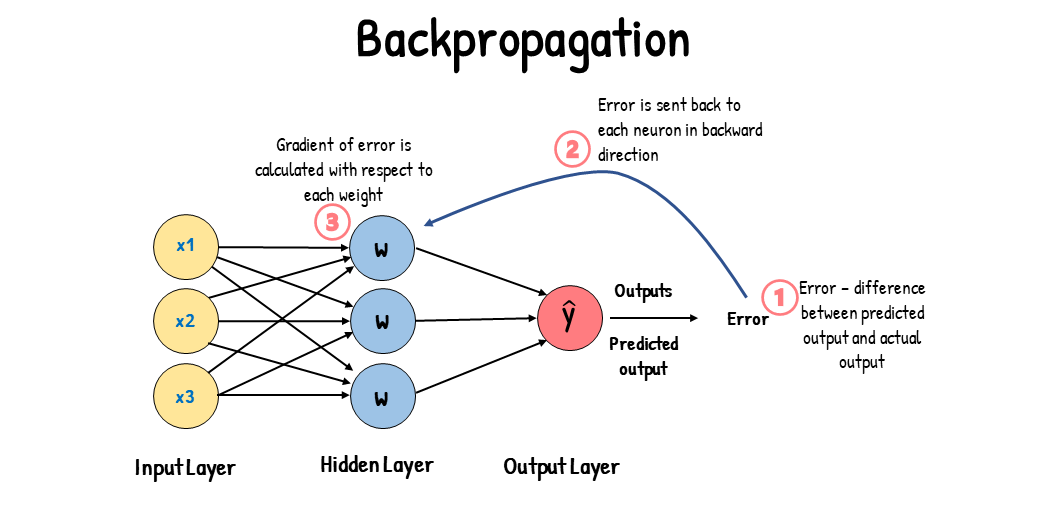

---


In [42]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [43]:
## divide dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [48]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [49]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [55]:
## Feature Engineering

geography=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)
# concatenate these variables with dataset
X.drop(['Geography','Gender'],axis=1,inplace=True)
X=pd.concat([X,geography,gender],axis=1)

In [56]:
# Spliting the dataset into test and training dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [145]:
## Creating the ANN

### **ANN Model**
ann_model = keras.Sequential([
    layers.Dense(7, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [146]:
## Early stopping

import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [147]:
model_history=ann_model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10,callbacks=early_stopping)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7776 - loss: 0.5588 - val_accuracy: 0.8023 - val_loss: 0.4706
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8055 - loss: 0.4590 - val_accuracy: 0.8080 - val_loss: 0.4439
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8014 - loss: 0.4481 - val_accuracy: 0.8099 - val_loss: 0.4360
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8110 - loss: 0.4282 - val_accuracy: 0.8171 - val_loss: 0.4290
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8134 - loss: 0.4236 - val_accuracy: 0.8198 - val_loss: 0.4191
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8319 - loss: 0.3955 - val_accuracy: 0.8251 - val_loss: 0.4099
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8375 - loss: 0.3881 - val_accuracy: 0.8307 - val_loss: 0.3986
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8469 - loss: 0.3735 - val_accuracy: 0.

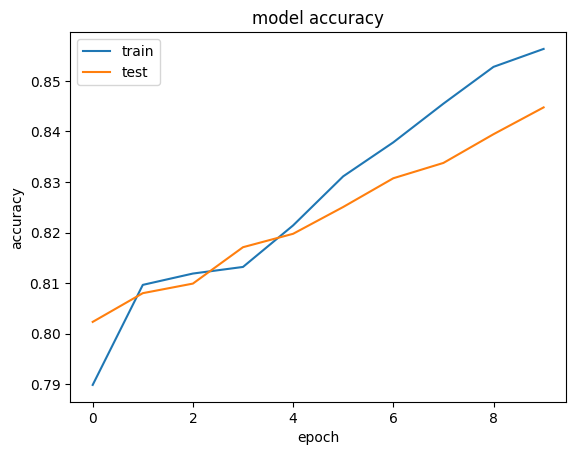

In [148]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

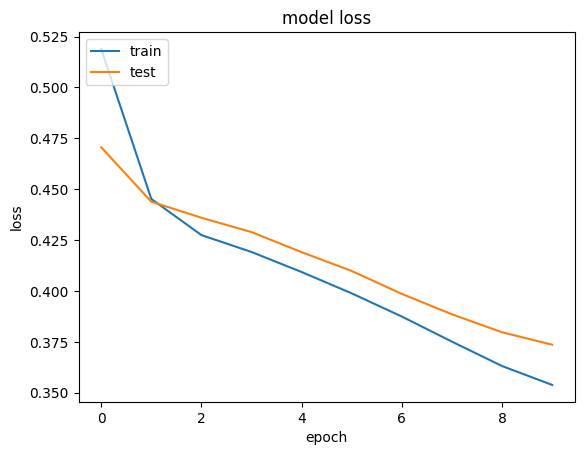

In [149]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC Score: 0.8395
GINI Coefficient: 0.6790
KS Statistic: 0.5389
Confusion Matrix:
 [[1526   69]
 [ 217  188]]
Accuracy: 0.8570
Precision: 0.7315
Recall: 0.4642
F1 Score: 0.5680


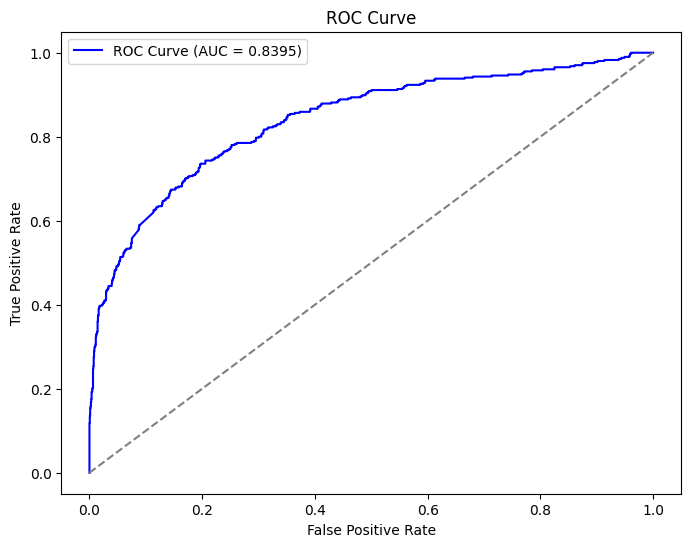

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix,\
accuracy_score,precision_score,recall_score,f1_score
from scipy.stats import ks_2samp

# Generate the prediction on test dataset
y_pred=ann_model.predict(X_test)

### **Calculate AUC**
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
### **Calculate GINI Coefficient**
gini = 2 * roc_auc - 1
### **Calculate KS Statistic**
ks_stat, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])

## Convert prediction into binary
y_pred_b = (y_pred >= 0.5).astype(int) 
### ** Generate Confusion matrix
cm=confusion_matrix(y_test,y_pred_b)
score=accuracy_score(y_test,y_pred_b)
precision = precision_score(y_test,y_pred_b)
recall = recall_score(y_test,y_pred_b)
f1 = f1_score(y_test,y_pred_b)

### **Print Metrics**
print(f"AUC Score: {roc_auc:.4f}")
print(f"GINI Coefficient: {gini:.4f}")
print(f"KS Statistic: {ks_stat[0]:.4f}")
print(f"Confusion Matrix:\n {cm}")
print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

### **Plot ROC Curve**
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC Score: 0.8472
GINI Coefficient: 0.6943
KS Statistic: 0.5468
Confusion Matrix:
 [[1534   61]
 [ 221  184]]
Accuracy: 0.8590
Precision: 0.7510
Recall: 0.4543
F1 Score: 0.5662


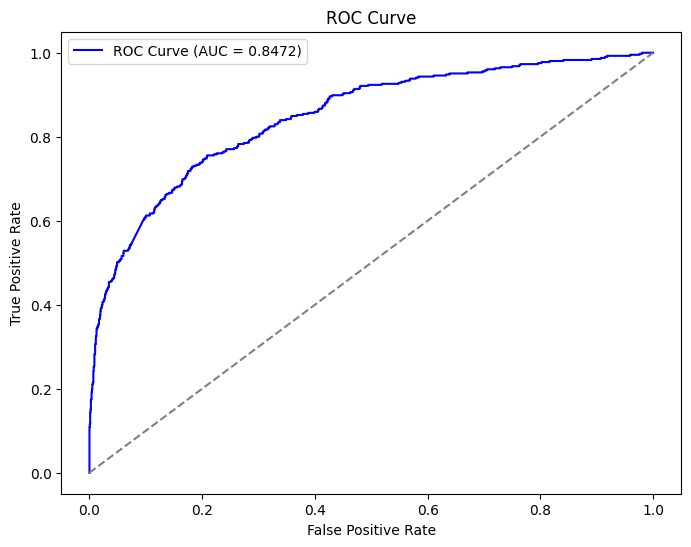

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix,\
accuracy_score,precision_score,recall_score,f1_score
from scipy.stats import ks_2samp

# Generate the prediction on test dataset
y_pred=ann_model.predict(X_test)

### **Calculate AUC**
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
### **Calculate GINI Coefficient**
gini = 2 * roc_auc - 1
### **Calculate KS Statistic**
ks_stat, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])

## Convert prediction into binary
y_pred_b = (y_pred >= 0.5).astype(int) 
### ** Generate Confusion matrix
cm=confusion_matrix(y_test,y_pred_b)
score=accuracy_score(y_test,y_pred_b)
precision = precision_score(y_test,y_pred_b)
recall = recall_score(y_test,y_pred_b)
f1 = f1_score(y_test,y_pred_b)

### **Print Metrics**
print(f"AUC Score: {roc_auc:.4f}")
print(f"GINI Coefficient: {gini:.4f}")
print(f"KS Statistic: {ks_stat[0]:.4f}")
print(f"Confusion Matrix:\n {cm}")
print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

### **Plot ROC Curve**
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

AUC Score: 0.5969
GINI Coefficient: 0.1938
KS Statistic: 0.1938
Confusion Matrix:
 [[1526   69]
 [ 309   96]]
Accuracy: 0.8110
Precision: 0.5818
Recall: 0.2370
F1 Score: 0.3368


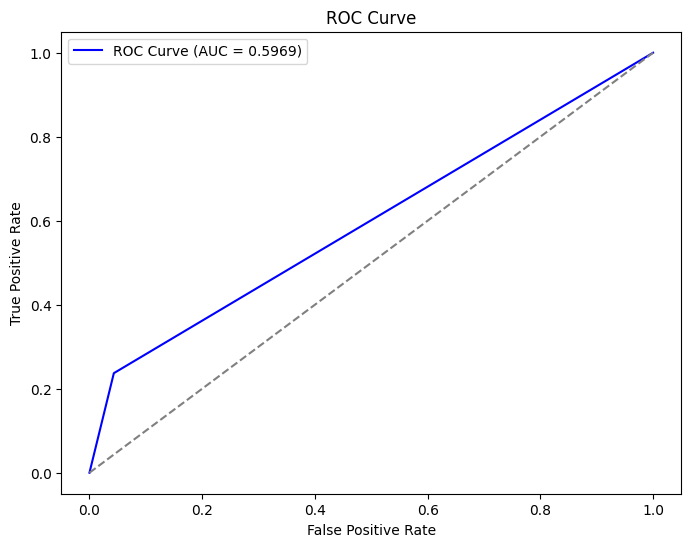

In [152]:
from sklearn.metrics import roc_curve, auc, confusion_matrix,\
accuracy_score,precision_score,recall_score,f1_score
from scipy.stats import ks_2samp

# Generate the prediction on test dataset
y_pred=model.predict(X_test)

### **Calculate AUC**
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
### **Calculate GINI Coefficient**
gini = 2 * roc_auc - 1
### **Calculate KS Statistic**
ks_stat, _ = ks_2samp(y_pred[y_test == 1], y_pred[y_test == 0])

## Convert prediction into binary
y_pred_b = (y_pred >= 0.5).astype(int) 
### ** Generate Confusion matrix
cm=confusion_matrix(y_test,y_pred_b)
score=accuracy_score(y_test,y_pred_b)
precision = precision_score(y_test,y_pred_b)
recall = recall_score(y_test,y_pred_b)
f1 = f1_score(y_test,y_pred_b)

### **Print Metrics**
print(f"AUC Score: {roc_auc:.4f}")
print(f"GINI Coefficient: {gini:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"Confusion Matrix:\n {cm}")
print(f"Accuracy: {score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

### **Plot ROC Curve**
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Designing an **Artificial Neural Network (ANN)** involves making key decisions about its **architecture, activation functions, and optimization strategy** based on the **complexity of the problem and available data**. Here’s how you can determine these components effectively:

---

### **1. Choosing the Number of Hidden Layers**
- **For Simple Problems (Linear Data):**  
  - Use **0 or 1 hidden layer** (Logistic Regression may suffice).
- **For Medium Complexity (Basic Patterns):**  
  - **1–2 hidden layers** usually work well (e.g., detecting edges in images).
- **For Complex Problems (Deep Learning Tasks):**  
  - Use **3+ hidden layers** (e.g., image recognition, NLP, or AI-powered forecasting).

✅ **Rule of Thumb**:  
Start with **1 hidden layer** and increase depth if performance doesn’t improve.

---

### **2. Determining the Number of Neurons Per Layer**
- **Too Few Neurons →** Model is **underfitting** (fails to learn patterns).
- **Too Many Neurons →** Model is **overfitting** (memorizes data instead of generalizing).

✅ **Common Approaches**:
1. **Empirical Rule** → Number of neurons in hidden layers is **between input and output neurons**.
2. **Grid Search or Random Search** → Experiment with different neuron counts.
3. **Power of Two Heuristic** → Start with **32, 64, 128, etc.**, and tune based on results.

---

### **3. Choosing an Activation Function**
| Activation Function | When to Use |
|---------------------|------------|
| **ReLU (Rectified Linear Unit)** | Standard for hidden layers (avoids vanishing gradients) |
| **Sigmoid** | Used in binary classification (maps output between 0 and 1) |
| **Softmax** | Used for multi-class classification (produces probabilities for multiple outputs) |
| **Tanh** | Used when outputs need to be between -1 and 1 |
| **Leaky ReLU** | Prevents dying neurons (useful for deep networks) |

✅ **Rule of Thumb**:  
- **Hidden layers → Use ReLU** (or Leaky ReLU if needed).
- **Output layer → Use Sigmoid (binary) or Softmax (multi-class).**

---

### **4. Choosing the Optimizer**
| Optimizer | When to Use |
|-----------|------------|
| **SGD (Stochastic Gradient Descent)** | Works well for simple models; can be slow for deep networks |
| **Adam (Adaptive Moment Estimation)** | Most commonly used; adapts learning rate dynamically |
| **RMSprop** | Works well for recurrent neural networks (RNNs) |
| **AdaGrad** | Good for sparse data problems |

✅ **Rule of Thumb**:  
- **Use Adam for general deep learning tasks** (efficient and widely used).
- **Use SGD if you have large datasets and need controlled learning**.

---

### **5. Additional Considerations**
🔹 **Loss Functions:**
   - **Binary Classification** → `binary_crossentropy`
   - **Multi-Class Classification** → `categorical_crossentropy`
   - **Regression Problems** → `mean_squared_error` or `mean_absolute_error`
   
🔹 **Regularization Techniques:**
   - Use **Dropout** to prevent overfitting.
   - Add **Batch Normalization** for stable learning.

---

### **Final Thought**
Start **simple** (1 hidden layer, ReLU activation, Adam optimizer) and adjust based on performance.  
Use **experiments** and **hyperparameter tuning** to find the optimal structure.